In [1]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords

Change the folder either to `instagram_data/` or to `twitter_data/`

In [2]:
folder  = 'instagram_data/' #twitter_data/ or instagram_data/

In [3]:
data = pd.read_csv(folder +'posts_processed.csv')
green = pd.read_csv(folder +'green_posts_processed.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Word clouds from Posts

Use either sustainable dataset (green) oder general (data) for the variable cloud_data to see the most frequent words 

In [4]:
df = green # or data

In [5]:
if "twitter" in folder:
    df['hashtag_wordcloud'] = np.where(((df['mentioned_hashtags'].isna())|(df['mentioned_hashtags'].str.len() < 3)|(df['mentioned_hashtags'] == "")),"[" "]",df['mentioned_hashtags'])
    df['user_mentions_wordcloud'] = np.where(((df['mentioned_usernames'].isna())|(df['mentioned_usernames'].str.len() < 3)|(df['mentioned_usernames'] == "")),"[" "]",df['mentioned_usernames'])
    df['hashtag_wordcloud'] = df['hashtag_wordcloud'].astype(str).apply(lambda x: " ".join(eval(x)))
    df['user_mentions_wordcloud'] = df['user_mentions_wordcloud'].astype(str).apply(lambda x: " ".join(eval(x)))
df

,platformId,platform,date,updated,type,post_text,postUrl,subscriberCount,score,media,...,username,actual,likes,comments,Branche,Branche-6,Sektor,B2B,B2C,green
0,355091021065555690_10145706,Instagram,2012-12-26 19:29:29,2022-06-23 22:21:38,photo,Pro Green X #PUMA tee @professorgreen #PUMAlife,https://www.instagram.com/p/TtiWb9iw7q/,0,-57.086404,"[{'type': 'photo', 'url': 'https://scontent-yy...",...,puma,"{'favoriteCount': 775, 'commentCount': 12}",775,12,mode,Textil,2.0,True,True,True
1,346237364735773953_10145706,Instagram,2012-12-14 14:18:51,2022-06-23 22:21:38,photo,A day in the life of #PUMA #pumalife - morning...,https://www.instagram.com/p/TOFQx9Cw0B/,0,-29.654785,"[{'type': 'photo', 'url': 'https://scontent-yy...",...,puma,"{'favoriteCount': 1486, 'commentCount': 29}",1486,29,mode,Textil,2.0,True,True,True
2,342685722404917046_10145706,Instagram,2012-12-09 16:42:23,2022-06-23 22:21:38,photo,"#PUMA, always looking good our friend @profess...",https://www.instagram.com/p/TBdtlRiw82/,0,-79.799290,"[{'type': 'photo', 'url': 'https://scontent-yy...",...,puma,"{'favoriteCount': 557, 'commentCount': 6}",557,6,mode,Textil,2.0,True,True,True
3,333882232069275743_25749975,Instagram,2012-11-27 13:11:25,2022-05-27 23:50:24,photo,Mercedes-Benz SLS AMG Coupé Black Series! #mer...,https://www.instagram.com/p/SiMB7_TcBf/,0,-27.810777,"[{'type': 'photo', 'url': 'https://scontent-se...",...,mercedesbenz,"{'favoriteCount': 3219, 'commentCount': 10}",3219,10,automobil,Automobil,2.0,True,True,True
4,329423030961684553_25749975,Instagram,2012-11-21 09:31:47,2022-05-27 23:50:24,photo,Say hello to the newest @mercedesamg powerhous...,https://www.instagram.com/p/SSWIBVTcBJ/,0,-22.427822,"[{'type': 'photo', 'url': 'https://scontent-se...",...,mercedesbenz,"{'favoriteCount': 3979, 'commentCount': 25}",3979,25,automobil,Automobil,2.0,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9333,2742155642375737703_43109246,Instagram,2022-01-02 08:00:47,2022-07-07 23:43:38,album,A powerful start to the day.\nThe BMW M5 CS.\n...,https://www.instagram.com/p/CYOGAc2o5Fn/,32377665,2.185437,"[{'type': 'photo', 'url': 'https://scontent-se...",...,bmw,"{'favoriteCount': 232218, 'commentCount': 695}",232218,695,automobil,Automobil,2.0,True,True,True
9334,2741880971927861036_25749975,Instagram,2022-01-01 22:55:30,2022-05-27 23:40:36,photo,Say hello to renewable adventures.\n\n📸 @lotte...,https://www.instagram.com/p/CYNHjeEKbcs/,34682189,-1.155339,"[{'type': 'photo', 'url': 'https://scontent-se...",...,mercedesbenz,"{'favoriteCount': 77451, 'commentCount': 276}",77451,276,automobil,Automobil,2.0,True,True,True
9335,2741715737230173911_462752227,Instagram,2022-01-01 17:26:46,2022-11-30 12:30:21,album,Commander of the fjords: the Macan gets to kno...,https://www.instagram.com/p/CYMh-_Qs-bX/,26065549,2.848996,"[{'type': 'photo', 'url': 'https://scontent-se...",...,porsche,"{'favoriteCount': 239375, 'commentCount': 462}",239375,462,automobil,Automobil,2.0,True,True,True
9336,2741566902972241322_43109246,Instagram,2022-01-01 12:31:04,2022-07-07 23:43:39,photo,Make this your first decision of 2022 🤔 \nThe ...,https://www.instagram.com/p/CYMAJKjoNWq/,32367896,1.504407,"[{'type': 'photo', 'url': 'https://scontent-se...",...,bmw,"{'favoriteCount': 158901, 'commentCount': 521}",158901,521,automobil,Automobil,2.0,True,True,True


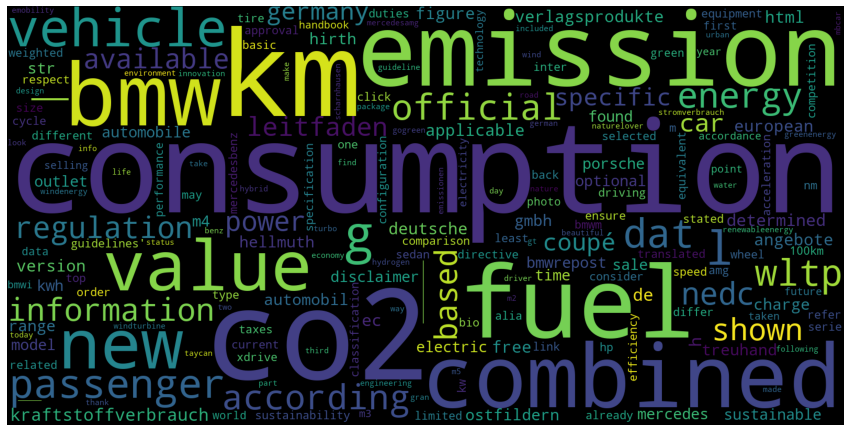

In [7]:
#import nltk 
#nltk.download('stopwords')

cloud_data = df
cloud_column = 'post_text' #options 'post_text' or for twitter also possible: 'hashtag_wordcloud' or 'user_mentions_wordcloud'

cloud_data[cloud_column] = cloud_data[cloud_column].astype(str)
cloud_data[cloud_column] = [entry.lower() for entry in cloud_data[cloud_column]]
text = ' '.join(cloud_data[cloud_column])
stop_words = ["https", "co", "t", "amp","li","e","rt","s", "x","ly","bit","u", "us"] + list(STOPWORDS) + stopwords.words('german')
wordcloud = WordCloud(width=1600, height=800, stopwords = stop_words, collocations=False).generate(str(text))

plt.figure( figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

change `df` variable to either sustainable dataset (`green`) oder general (`data`) to see the most frequent words per company

IndexError: list index out of range

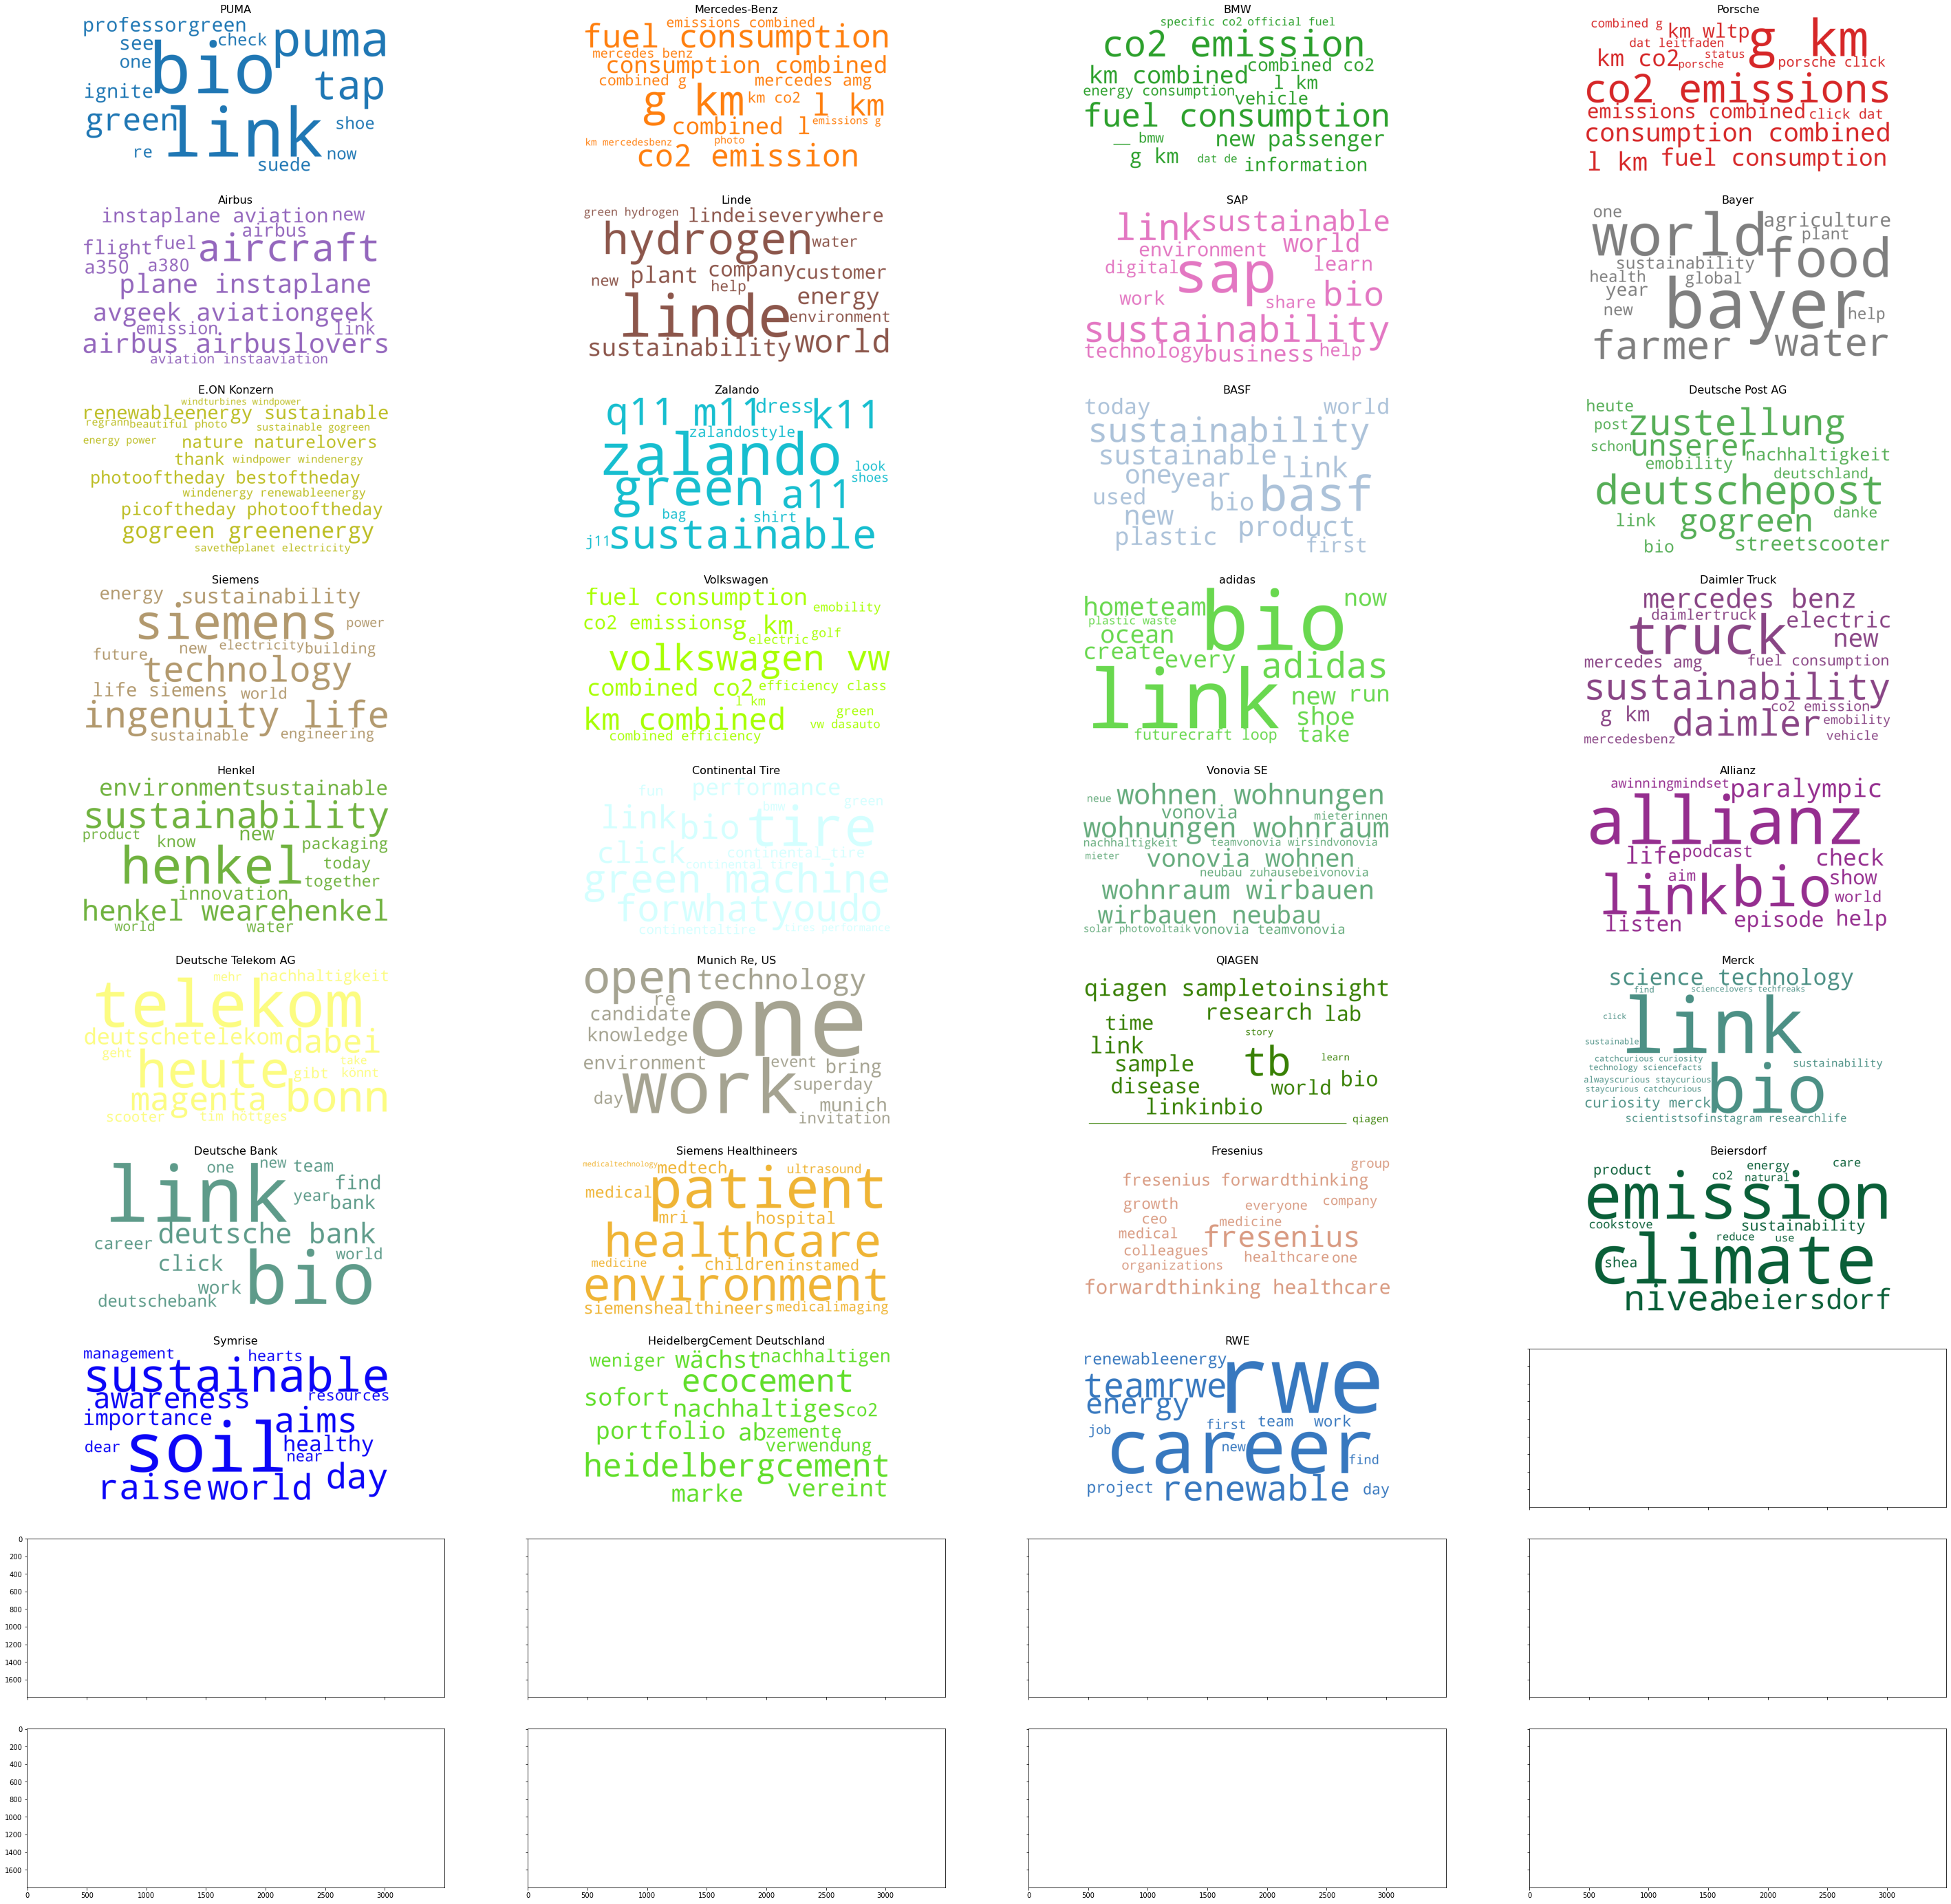

In [8]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import matplotlib.colors as mcolors
from nltk.corpus import stopwords

df = cloud_data #change to either green or data

stop_words = ["https", "co", "t", "amp","li","e","rt","s", "x","ly","bit","u", "us"] + list(STOPWORDS) + stopwords.words('german')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] + [color for name, color in mcolors.XKCD_COLORS.items()]
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=3500,
                  height=1800,
                  max_words=14,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

fig, axes = plt.subplots(10, 4, figsize=(50,50), sharex=True, sharey=True)
companies = df['author'].unique().tolist()
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    comp_data = df
    comp_data = comp_data[comp_data['author'] == companies[i]]
    #cloud_data['Tweets_lower'] = [entry.lower() for entry in cloud_data[cloud_column]]
    text = ' '.join(comp_data[cloud_column])

    cloud.generate(str(text))
    plt.gca().imshow(cloud)
    plt.gca().set_title(str(companies[i]), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.figure(figsize=(9, 3.5), dpi=1600)
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
'''plt.savefig("wordclouds", 
                          dpi=3600,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches=None, 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)'''